In [1]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
%load_ext autoreload
%autoreload 2

In [2]:
from cs231n.features import color_histogram_hsv, hog_feature

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
# Load the raw CIFAR-10 data
  cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
  X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
  
  # Subsample the data
  mask = range(num_training, num_training + num_validation)
  X_val = X_train[mask]
  y_val = y_train[mask]
  mask = range(num_training)
  X_train = X_train[mask]
  y_train = y_train[mask]
  mask = range(num_test)
  X_test = X_test[mask]
  y_test = y_test[mask]

  return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

In [3]:
from cs231n.features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

In [4]:
#one hot vector representation of class labels
Y_train=np.zeros((49000,10)) 
for i in xrange(49000):    
    onePos=y_train[i]
    Y_train[i,onePos]=1
    
Y_test=np.zeros((1000,10))
for i in xrange(1000):
    onePos=y_test[i]
    Y_test[i,onePos]=1

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

model = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.
model.add(Dense(100, input_dim=155, init='uniform'))
model.add(Activation('tanh'))
model.add(Dropout(0.5))
model.add(Dense(100, init='uniform'))
model.add(Activation('tanh'))
model.add(Dropout(0.5))

model.add(Dense(10, init='uniform'))
model.add(Activation('softmax'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.fit(X_train_feats, Y_train, batch_size=1000,nb_epoch=100,verbose=True)

Epoch 1/100
49000/49000 [==============================] - 23s - loss: 1.8947 - acc: 0.3197    
Epoch 2/100
49000/49000 [==============================] - 2s - loss: 1.5193 - acc: 0.4579     
Epoch 3/100
49000/49000 [==============================] - 2s - loss: 1.4828 - acc: 0.4764     
Epoch 4/100
49000/49000 [==============================] - 2s - loss: 1.4658 - acc: 0.4810     
Epoch 5/100
 6000/49000 [==>...........................] - ETA: 1s - loss: 1.4443 - acc: 0.4895

ValueError: I/O operation on closed file

In [6]:
score = model.evaluate(X_test_feats, Y_test, batch_size=1000,verbose=False)
print score

[1.3355588912963867, 0.53100001811981201]


In [7]:
X_train.shape

(49000, 32, 32, 3)

In [8]:
#converting to the dimesional arrangement required by keras for CNN
X_train=np.swapaxes(X_train,1,3)
X_test=np.swapaxes(X_test,1,3)

In [9]:
X_train.shape

(49000, 3, 32, 32)

In [10]:
X_test.shape

(1000, 3, 32, 32)

In [11]:
Y_test[0]

array([ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.])

In [12]:
Y_train[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.])

TypeError: Invalid dimensions for image data

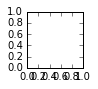

In [13]:
#import matplotlib.pyplot as plt
#%matplotlib inline
#plt.rcParams['figure.figsize'] = (2.0, 1.0) # set default size of plots
#plt.rcParams['image.interpolation'] = 'nearest'
#plt.rcParams['image.cmap'] = 'gray'
#plt.imshow(X_train[80].astype('uint8'))
#plt.axis('off')

In [23]:
#let us just train on the first 10000 images and see what happens
Xtrain=X_train[0:30000]
Xtest=X_test[0:30000]


In [24]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import np_utils

In [25]:
   model = Sequential()
 
   model.add(Convolution2D(32, 3, 3, border_mode='same',
                           input_shape=(3, 32, 32)))
   model.add(Activation('relu'))
   model.add(Convolution2D(32, 3, 3))
   model.add(Activation('relu'))
   model.add(MaxPooling2D(pool_size=(2, 2)))
   model.add(Dropout(0.25))
 
   model.add(Convolution2D(64, 3, 3, border_mode='same'))
   model.add(Activation('relu'))
   model.add(Convolution2D(64, 3, 3))
   model.add(Activation('relu'))
   model.add(MaxPooling2D(pool_size=(2, 2)))
   model.add(Dropout(0.25))
 
   model.add(Flatten())
   model.add(Dense(512))
   model.add(Activation('relu'))
   model.add(Dropout(0.5))
   model.add(Dense(10))
   model.add(Activation('softmax'))
 
   sgd = SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
   model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])
 
   model.fit(X_train[0:30000], Y_train[0:30000], nb_epoch=200, batch_size=32,
             validation_split=0.1,shuffle=True, show_accuracy=True, verbose=True)

Train on 27000 samples, validate on 3000 samples
Epoch 1/200
27000/27000 [==============================] - 316s - loss: 7.9150 - acc: 0.1060 - val_loss: 2.3030 - val_acc: 0.1080
Epoch 2/200
27000/27000 [==============================] - 339s - loss: 2.3035 - acc: 0.1111 - val_loss: 2.3007 - val_acc: 0.1187
Epoch 3/200
27000/27000 [==============================] - 359s - loss: 2.2962 - acc: 0.1209 - val_loss: 2.2718 - val_acc: 0.1537
Epoch 4/200
27000/27000 [==============================] - 289s - loss: 2.2442 - acc: 0.1540 - val_loss: 2.1770 - val_acc: 0.1907
Epoch 5/200
27000/27000 [==============================] - 307s - loss: 2.1760 - acc: 0.1895 - val_loss: 2.1025 - val_acc: 0.2163
Epoch 6/200
27000/27000 [==============================] - 289s - loss: 2.1308 - acc: 0.2096 - val_loss: 2.0825 - val_acc: 0.2347
Epoch 7/200
27000/27000 [==============================] - 289s - loss: 2.0952 - acc: 0.2236 - val_loss: 2.0531 - val_acc: 0.2537
Epoch 8/200
27000/27000 [================

ValueError: I/O operation on closed file

In [ ]:
model.evaluate(X_train[20000:25000], Y_train[20000:25000], batch_size=100,verbose=True)